### Modélisation et évaluation:
### Construire un modèle de régression logistique. Utiliser la validation croisée pour évaluer la
### précision, le rappel, et le score F1 du modèle.

In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score

# here we load the dataset

data = pd.read_csv('/home/shym/Desktop/chaimas2/ml/TALHI-CHAIMA-CS-M1/test/california_housing.csv')

# Select the features and target variable

X = data.drop('MedianHouseValue', axis=1) 
priceColumn=data["MedianHouseValue"]
averagePrice=np.median(priceColumn)
y=(priceColumn < averagePrice).astype(int)

# create logistic reg

model = LogisticRegression(tol=0.01,max_iter=2000,random_state=42)
model.fit(X,y)

# Create a cross validation 

scores = cross_val_score(model, X, y, scoring=scoring)

# Calculate and print the precision, recall, and F1 score
precision = cross_val_score(model, X, y,  scoring='precision')
print("Precision:", precision.mean())
recall = cross_val_score(model, X, y,  scoring='recall')
print("Recall:", recall.mean())
f1 = cross_val_score(model, X, y,  scoring='f1')
print("F1 Score:", f1.mean())

Precision: 0.7934930674458286
Recall: 0.7719825496849249
F1 Score: 0.7793729764790751


### nterprétation et visualisation du modèle:
### Visualiser la courbe ROC et calculer l'aire sous la courbe (AUC).

Area under the curve :  0.8691128155592773


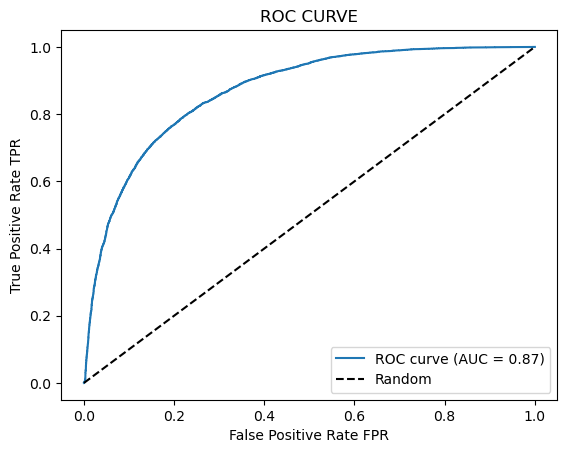

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc


#  cross validation 
pred = cross_val_predict(model, X, y, method='predict_proba')[:, 1]

# CALCULATE THE  positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y, pred)

# Calculer le Area under the curve "AUC"
roc_auc = auc(fpr, tpr)

print("Area under the curve : ", roc_auc)

# visualisation 
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--',label='Random')  # Plotting the random guess line
plt.xlabel('False Positive Rate FPR')
plt.ylabel('True Positive Rate TPR')
plt.title('ROC CURVE')
plt.legend()
plt.show()





### Partie 3: Classification par Arbres de Décision
### Questions:
### 1. Construction de l'arbre de décision:

### Utiliser les mêmes données de la Partie 2 pour entraîner un arbre de décision. Expérimenter avec
### différents paramètres tels que la profondeur maximale de l'arbre et le nombre minimum
### d'échantillons requis pour être une feuille.

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Separate the data
X = data.drop('MedianHouseValue', axis=1)
y = np.where(data['MedianHouseValue'] > 3.5, 1, 0)  # Binary classification

# Split the data into training and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Experiment with different parameters
maxDepth_values = [3, 5, 10]  # Maximum 
min_values = [5, 10, 15]  # Minimum

# Iterate over different parameter combinations
for max_depth in maxDepth_values:
    for min_samples_leaf in min_values:
      
        # Create and train the decision tree model
        model = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
        model.fit(X_train, y_train)

        # Make predictions on the test set
        ypred = model.predict(X_test)

       
        # Print the parameter values and accuracy
        print("Max Depth:", max_depth)
        print("Min Samples Leaf:", min_samples_leaf)
       
        print()

Max Depth: 3
Min Samples Leaf: 5

Max Depth: 3
Min Samples Leaf: 10

Max Depth: 3
Min Samples Leaf: 15

Max Depth: 5
Min Samples Leaf: 5

Max Depth: 5
Min Samples Leaf: 10

Max Depth: 5
Min Samples Leaf: 15

Max Depth: 10
Min Samples Leaf: 5

Max Depth: 10
Min Samples Leaf: 10

Max Depth: 10
Min Samples Leaf: 15



### Évaluation du modèle:
### Comparer les performances de l'arbre de décision avec le modèle de régression logistique de la
### Partie 2 en utilisant les mêmes métriques d'évaluation.

In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

# Load the dataset
data = pd.read_csv('/home/shym/Desktop/chaimas2/ml/TALHI-CHAIMA-CS-M1/test/california_housing.csv')

# Select the features and target variable
X = data.drop('MedianHouseValue', axis=1)
y = np.where(data['MedianHouseValue'] > 3.5, 1, 0)  # Binary classification

# Decision Tree

dtree_model = DecisionTreeClassifier(max_depth=3, random_state=42)
dtree_precision = cross_val_score(dtree_model, X, y , scoring='precision')
print("Decision Tree - Precision is :", dtree_precision.mean())
dtree_recall = cross_val_score(dtree_model, X, y, scoring='recall')
print("Decision Tree - Recall is :", dtree_recall.mean())
dtree_f1 = cross_val_score(dtree_model, X, y , scoring='f1')
print("Decision Tree - F1 Score is :", dtree_f1.mean())

# Logistic Regression
lreg_model = LogisticRegression(tol=0.01,max_iter=2000,random_state=42)
lreg_precision = cross_val_score(lreg_model, X, y,  scoring='precision')
print("Logistic Regression - Precision is :", lr_precision.mean())
lreg_recall = cross_val_score(lreg_model, X, y,  scoring='recall')
print("Logistic Regression - Recall is :", lr_recall.mean())
lreg_f1 = cross_val_score(lreg_model, X, y, scoring='f1')
print("Logistic Regression - F1 Score is :", lr_f1.mean())


Decision Tree - Precision is : 0.859994753486828
Decision Tree - Recall is : 0.370734766348079
Decision Tree - F1 Score is : 0.5106229600382044
Logistic Regression - Precision is : 0.7973379668485723
Logistic Regression - Recall is : 0.5215027766234748
Logistic Regression - F1 Score is : 0.6253906883962066


### Interprétation du modèle:
### Visualiser l'arbre de décision et discuter de l'importance des différentes caractéristiques utilisées
### pour la classification.
### Analyser les différentes branches de l'arbre et identifier les règles de décision les plus importantes.

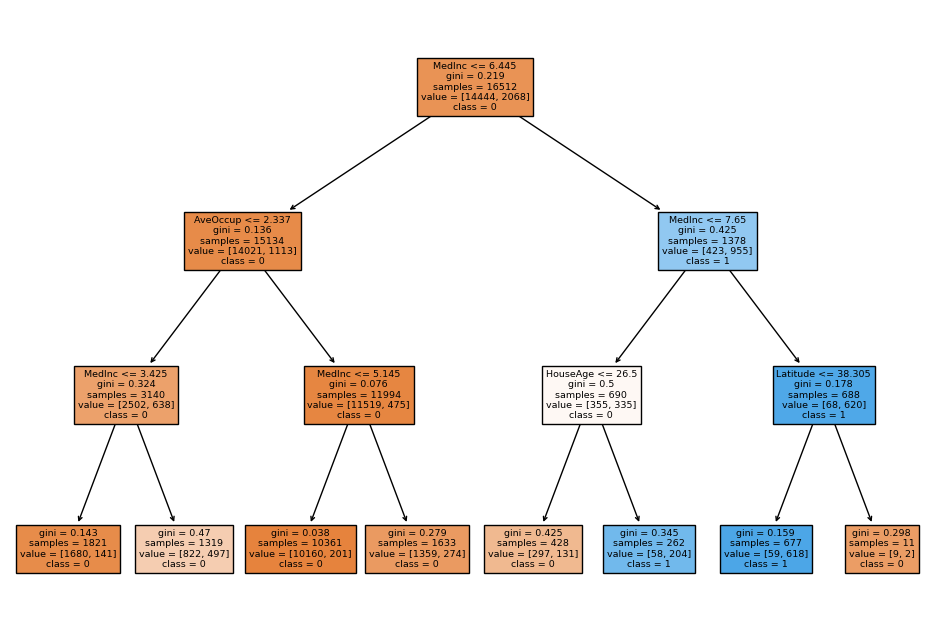

|--- MedInc <= 6.55
|   |--- AveOccup <= 2.45
|   |   |--- MedInc <= 3.97
|   |   |   |--- class: 0
|   |   |--- MedInc >  3.97
|   |   |   |--- class: 0
|   |--- AveOccup >  2.45
|   |   |--- MedInc <= 5.14
|   |   |   |--- class: 0
|   |   |--- MedInc >  5.14
|   |   |   |--- class: 0
|--- MedInc >  6.55
|   |--- MedInc <= 7.82
|   |   |--- HouseAge <= 25.50
|   |   |   |--- class: 0
|   |   |--- HouseAge >  25.50
|   |   |   |--- class: 1
|   |--- MedInc >  7.82
|   |   |--- Population <= 56.50
|   |   |   |--- class: 0
|   |   |--- Population >  56.50
|   |   |   |--- class: 1



In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


# Separate the data
X = data.drop('MedianHouseValue', axis=1)
y = np.where(data['MedianHouseValue'] > 3.5, 1, 0)  # Binary classification


# Train the decision tree model
dtree_model = DecisionTreeClassifier(max_depth=3, random_state=42)
dtree_model.fit(X, y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the decision tree model
model = DecisionTreeClassifier(max_depth=3, min_samples_leaf=10)
model.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=X.columns.tolist(), class_names=['0', '1'], filled=True)
plt.show()


# Generate text representation of the decision tree
tree_rules = export_text(dtree_model, feature_names=list(X.columns))
print(tree_rules)

### Interprétation et comparaison du modèle:
### Evaluer les performances du modèle d'arbre de décision sur l'ensemble de test.
### Comparer les performances du modèle d'arbre de décision avec celles du modèle de régression
### logistique.

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Separate the data
X = data.drop('MedianHouseValue', axis=1)
y = np.where(data['MedianHouseValue'] > 3.5, 1, 0)  # Binary classification

# Split the data into training and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the decision tree 
decision_tree = DecisionTreeClassifier(max_depth=3, min_samples_leaf=10)
decision_tree.fit(X_train, y_train)

# Make predictions with the decision tree model
yPred_dtree = decision_tree.predict(X_test)

# Evaluate the decision tree model
precision_dtree = precision_score(y_test, yPred_dtree)
recall_dtree = recall_score(y_test, yPred_dtree)
f1_dtree = f1_score(y_test, yPred_dtree)

# Create and train the logistic regression model
logistic_regression = LogisticRegression(tol=0.01,max_iter=2000,random_state=42)
logistic_regression.fit(X_train, y_train)

# Make predictions with the logistic regression model
yPred_lreg = logistic_regression.predict(X_test)

# Evaluate the logistic regression model
precision_lreg = precision_score(y_test, yPred_lreg)
recall_lreg = recall_score(y_test, yPred_lreg)
f1_lreg = f1_score(y_test, yPred_lreg)

# Print the performance metrics
print("for the Decision Tree Model:")
print("Precision:", precision_dtree)
print("Recall:", recall_dtree)
print("F1 Score:", f1_dtree)

print("\nfor the Logistic Regression Model:")
print("Precision:", precision_lreg)
print("Recall:", recall_lreg)
print("F1 Score:", f1_lreg)

for the Decision Tree Model:
Precision: 0.85
Recall: 0.3837981407702523
F1 Score: 0.5288197621225983

for the Logistic Regression Model:
Precision: 0.8024691358024691
Recall: 0.5179282868525896
F1 Score: 0.6295399515738499
